# # F_2_Tuning parameters of RF(downsampling)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#load the files

X_train = pd.read_csv('../data/x_y_data/re_smote/down_X_resampled.csv')
y_train = pd.read_csv('../data/x_y_data/re_smote/down_y_resampled.csv')
X_test = pd.read_csv('../data/x_y_data/re_smote/down_X_test.csv')
y_test = pd.read_csv('../data/x_y_data/re_smote/down_y_test.csv')
#data = pd.read_csv('../data/cleaned_data/cleaned_data.csv')

In [3]:
y_train.loc[y_train['churn'] == 'Yes', 'churn'] = 1
y_train.loc[y_train['churn'] == 'No', 'churn'] = 0
y_train['churn'].value_counts()

churn
0    1495
1    1495
Name: count, dtype: int64

In [4]:
y_train['churn'] =y_train['churn'].astype('int64')
y_train['churn'].dtypes

dtype('int64')

In [5]:
y_test.loc[y_test['churn'] == 'Yes', 'churn'] = 1
y_test.loc[y_test['churn'] == 'No', 'churn'] = 0
y_test['churn'].value_counts()

churn
0    1033
1     374
Name: count, dtype: int64

In [6]:
y_test['churn'] =y_test['churn'].astype('int64')
y_test['churn'].dtypes

dtype('int64')

In [7]:
#set the high-parameter
import warnings
from tqdm.auto import tqdm

# Disable warnings
warnings.filterwarnings("ignore")

param_grid = {
    'n_estimators': [75, 100, 125,150],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_depth': [5, 10,15,20],
    'max_features': ['sqrt']  # round(sqrt(#cols))
}

rf = RandomForestClassifier(random_state=12345)

kappa_scorer = make_scorer(cohen_kappa_score)

# Disable tqdm progress bar and set mininterval to suppress messages
with tqdm(total=600, mininterval=1e-9) as pbar:
    grid_search = GridSearchCV(rf, param_grid, cv=5, return_train_score=True,
                               n_jobs=-1, verbose=20, scoring=kappa_scorer)
    grid_search.fit(X_train, y_train)
    pbar.update()  # Make sure progress bar completes

# Enable warnings again
warnings.filterwarnings("default")

grid_search.best_params_  # To check the best set of parameters returned


  0%|          | 0/600 [00:00<?, ?it/s]

Fitting 5 folds for each of 128 candidates, totalling 640 fits


/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 1/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 1/5; 1/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.552, test=0.475) total time=   0.5s
[CV 3/5; 3/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 3/5; 3/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.565, test=0.455) total time=   0.8s
[CV 1/5; 5/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75
[CV 1/5; 5/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75;, score=(train=0.550, test=0.475) total time=   0.5s
[CV 5/5; 5/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_l

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 2/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 2/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.569, test=0.448) total time=   0.8s
[CV 1/5; 4/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 4/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.549, test=0.472) total time=   0.9s
[CV 4/5; 5/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75
[CV 4/5; 5/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75;, score=(train=0.552, test=0.565) total time=   0.5s
[CV 5/5; 6/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 1/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 4/5; 1/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.548, test=0.569) total time=   0.5s
[CV 2/5; 3/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 2/5; 3/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.559, test=0.505) total time=   0.8s
[CV 4/5; 4/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 4/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.543, test=0.552) total time=   0.9s
[CV 1/5; 7/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 2/5; 1/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 2/5; 1/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.568, test=0.508) total time=   0.5s
[CV 4/5; 2/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 2/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.548, test=0.555) total time=   0.7s
[CV 3/5; 4/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 4/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.567, test=0.452) total time=   0.9s
[CV 3/5; 6/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 2/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 2/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.550, test=0.475) total time=   0.8s
[CV 5/5; 3/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 5/5; 3/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.539, test=0.535) total time=   0.7s
[CV 3/5; 5/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75
[CV 3/5; 5/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75;, score=(train=0.570, test=0.458) total time=   0.5s
[CV 2/5; 6/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 1/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 3/5; 1/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.569, test=0.452) total time=   0.5s
[CV 1/5; 3/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 1/5; 3/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.553, test=0.472) total time=   0.8s
[CV 5/5; 4/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 4/128] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.536, test=0.535) total time=   1.0s
[CV 2/5; 7/128] START criterion=gini, max_depth=5, max_features=sqrt, min_samples

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

[CV 5/5; 81/128] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.809, test=0.502) total time=   1.7s
[CV 3/5; 83/128] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 3/5; 83/128] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.810, test=0.468) total time=   2.1s
[CV 1/5; 85/128] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75
[CV 1/5; 85/128] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75;, score=(train=0.790, test=0.515) total time=   1.4s
[CV 1/5; 86/128] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=100
[CV 1/5; 86/128] END criterion=entropy, max_depth=10

In [8]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

##### The parameter 
{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100} was chosen. 

####  Cross validation socre - Kappa-

In [9]:
rf1= RandomForestClassifier(criterion= 'entropy',
 max_depth= 10,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 3,
 n_estimators= 100)

results = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results = cross_val_score(rf1, X_train, y_train, cv=kfold, scoring=kappa_scorer)

results.append(cv_results)
    
msg = f" RF: {cv_results.mean()} ({cv_results.std()})"
print(msg)

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

 RF: 0.0 (0.0)


### Variable Importance 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


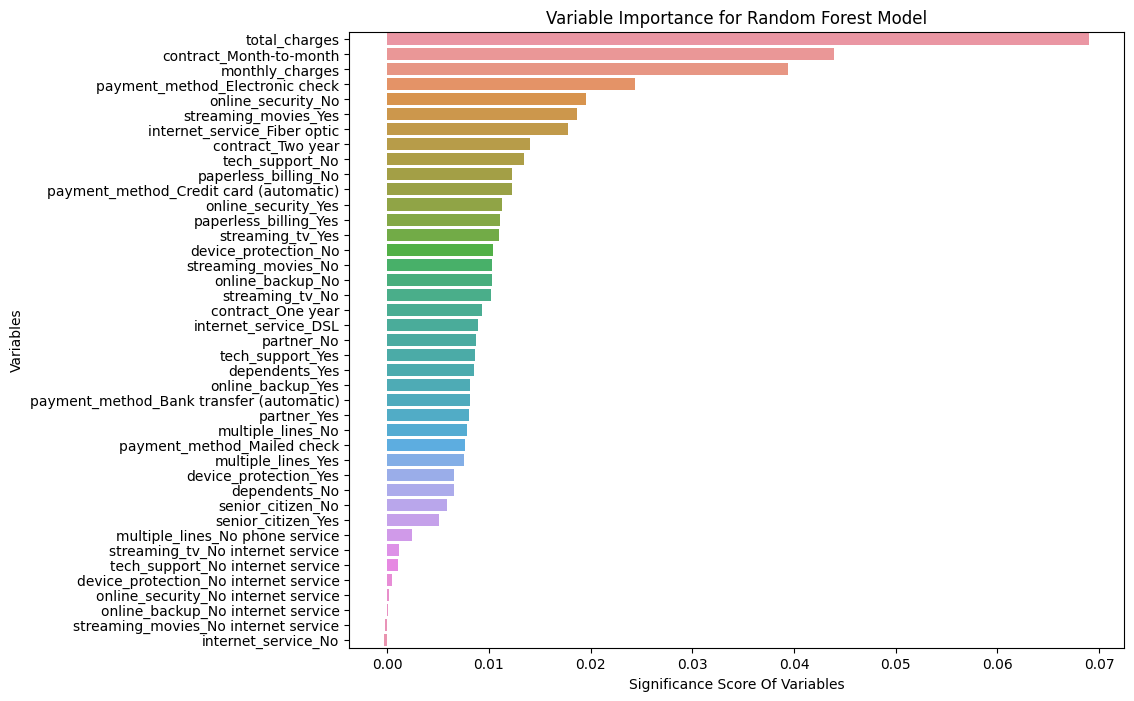

In [10]:
X_train2 = X_train.copy()  
y_train2 = y_train.copy()



rf_tuned = rf1.fit(X_train2, y_train2)

from sklearn.inspection import permutation_importance


# Calculate permutation feature importances
result = permutation_importance(rf_tuned, X_train2, y_train2, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_train2.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8)) 
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for Random Forest Model")
plt.show()


In [11]:
feature_importances_df = pd.DataFrame(feature_importances)
feature_importances_df.head()

,0
total_charges,0.068997
contract_Month-to-month,0.043913
monthly_charges,0.039398
payment_method_Electronic check,0.024381
online_security_No,0.019565


In [12]:
feature_importances_df = feature_importances_df.rename(columns={0:'Significance Score'})
feature_importances_df.head(2)

,Significance Score
total_charges,0.068997
contract_Month-to-month,0.043913


In [13]:
feature_importances_df.T.to_csv('../data/Significant_Score/RE_down_SMOTE_RF_Significance_Score.csv', index=False)

### the classification report

In [14]:
from sklearn.metrics import confusion_matrix


y_pred = rf1.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[715, 318],
       [ 76, 298]])

In [15]:
y_pred_df = pd.DataFrame(y_pred)

y_pred_df.value_counts()

0    791
1    616
Name: count, dtype: int64

In [16]:
y_test_df = pd.DataFrame(y_test)

y_test_df.value_counts()

churn
0        1033
1         374
Name: count, dtype: int64

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


y_pred = rf1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df)

,Metric,Score
0,Accuracy,0.719972
1,Precision,0.483766
2,Recall,0.796791
3,F1-Score,0.602020
4,Kappa,0.405299


In [18]:
metrics_df.to_csv('../data/metrics/RE_down_SMOTE_rf_metrics.csv', index=False)

In [ ]:
#further investigation 
